____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521__<br/>
__Aprendizaje supervisado: clasificacion__<br/>
__Elaborado por: Martin Palazzo__
____

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importamos librerias de scikit learn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing

In [2]:
# creamos un dataset sintetico de 2 variables y 100 muestras
x, y = make_classification(n_samples = 200, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep = 0.7)

In [3]:
type(x)

numpy.ndarray

In [4]:
type(y)

numpy.ndarray

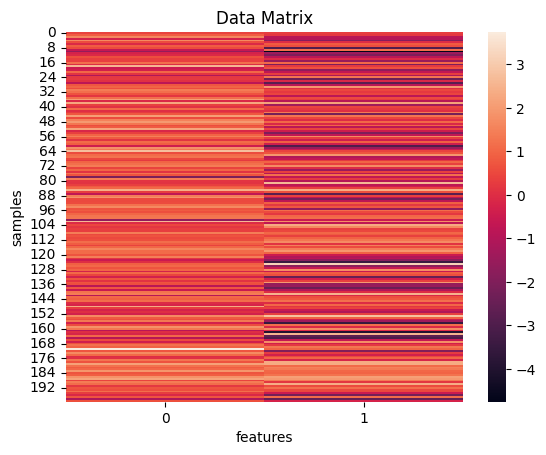

In [5]:
# visualizamos la matriz de variables
sns.heatmap(x)
plt.ylabel('samples')
plt.xlabel('features')
plt.title('Data Matrix')
plt.show()

In [6]:
# observamos el vector de labels
y

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


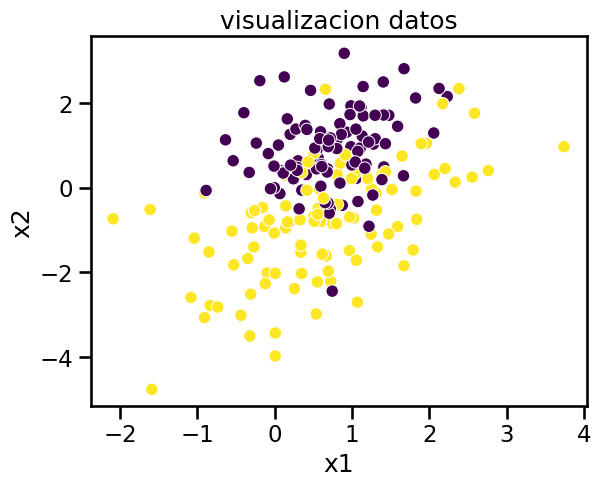

In [7]:
# al ser un dataset de 2 dimensiones podemos visualizarlo con un scatterplot
sns.set_context('talk')
sns.scatterplot(x[:,0],x[:,1], c = y, palette = "Paired")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('visualizacion datos')
plt.show()

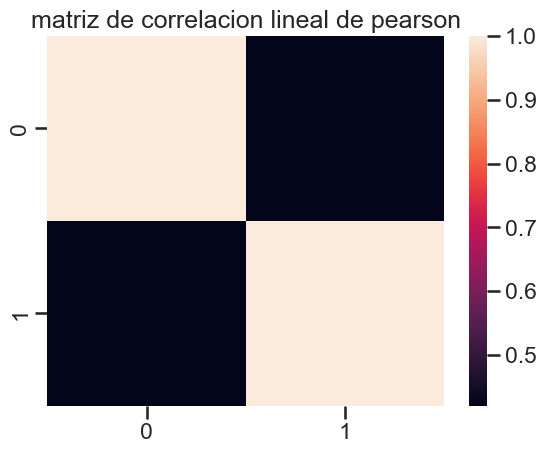

In [8]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(np.corrcoef(x.T))
plt.title('matriz de correlacion lineal de pearson')
plt.show()

In [9]:
# obtenemos xtrain, xtest, ytrain e ytest :) 
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2, random_state=4)

In [10]:
# declaramos un standard scaler y lo ajustamos a los datos de entrenamiento
scaler = preprocessing.StandardScaler().fit(xtr)
scaler

StandardScaler()

In [11]:
# transformamos nuestros datos de entrenamiento y de test
xtr_scal = scaler.transform(xtr)  
xte_scal = scaler.transform(xte)

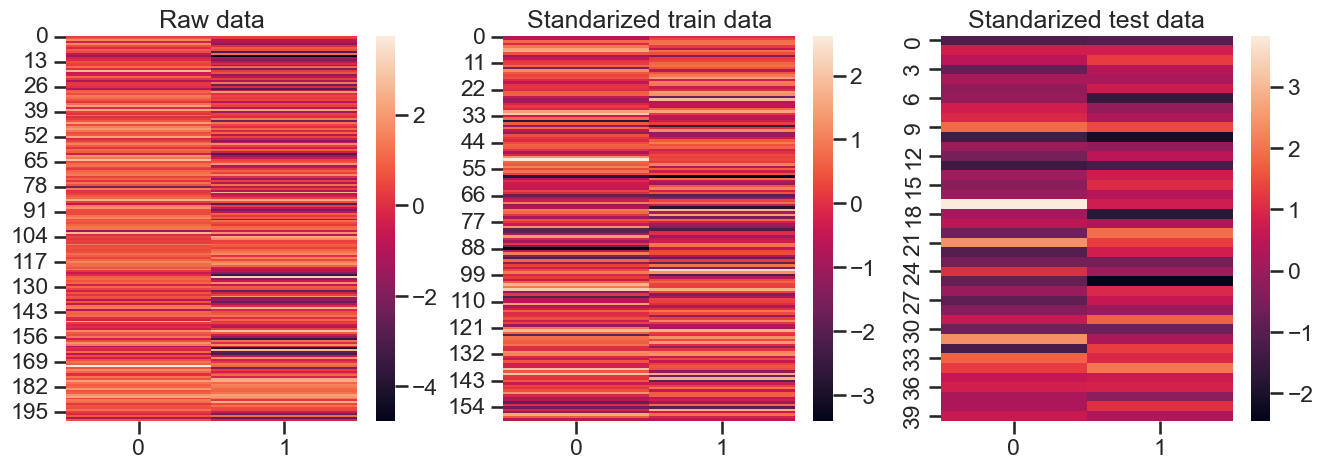

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtr_scal, ax = axs[1])
sns.heatmap(xte_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100], 'gamma':[0.1,1, 10,100]}
svc = svm.SVC(probability=True)
clf_svm = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)

In [14]:

# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
clf_svm.fit(xtr_scal, ytr) 

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')})

In [15]:
# observamos el mejor modelo y combinacion de hiperparametros que ganaron en el cross validation
clf_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [16]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = clf_svm.predict(xte_scal)

In [17]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(yte, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8


In [18]:
#compute and plot AUC
yproba = clf_svm.predict_proba(xte_scal)
fpr1, tpr1, thresholds = roc_curve(yte.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.9002557544757034


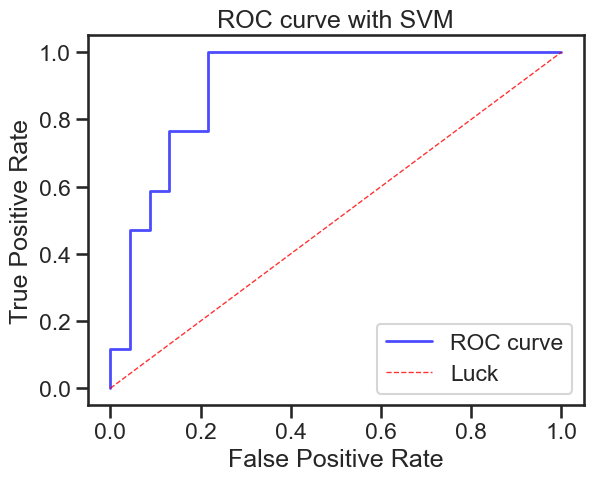

In [19]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM')
plt.show()

In [20]:
# Compute confusion Matrix
cm = confusion_matrix(yte, ypred)
cm

array([[20,  3],
       [ 5, 12]], dtype=int64)

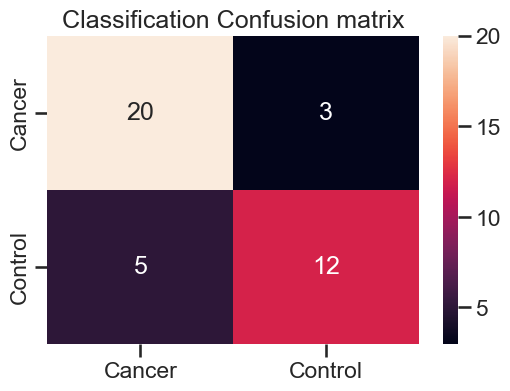

In [21]:
df_cm = pd.DataFrame(cm, index = ['Cancer', 'Control'], columns = ['Cancer', 'Control'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()